In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

In [7]:
data=np.loadtxt('/Users/jacquelin/Documents/python/MachineLearning-imooc-master/机器学习项目实战/dermatology.data.txt',delimiter=',',converters={33: lambda x: x if str(x).isdigit()  else int(x=="?") , 34: lambda x:int(x)-1} )


### 模型构建、类别预测、评估

In [22]:
X=data[:,:33]
y=data[:,34]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=666)


In [29]:
X_train_re=xgb.DMatrix(X_train,label=y_train)
X_test_re=xgb.DMatrix(X_test,label=y_test)

params={
    'booster':'gbtree',
    'objective':'multi:softmax',      #多元特征
    'num_class':6,
    'max_depth':5,
    'lambda':10,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta':0.1,
    'seed':0,
    'nthread':4,
    'silent':1
}

watchlist=[(X_train_re,'train'),(X_test_re,'test')]
num_round=6
xgb_clf=xgb.train(params,X_train_re,num_round,watchlist)

#yuce
y_pred=xgb_clf.predict(X_test_re)
print(y_pred)

#混淆矩阵
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)


[0]	train-merror:0.058394	test-merror:0.130435
[1]	train-merror:0.032847	test-merror:0.065217
[2]	train-merror:0.025547	test-merror:0.032609
[3]	train-merror:0.025547	test-merror:0.032609
[4]	train-merror:0.014599	test-merror:0.032609
[5]	train-merror:0.010949	test-merror:0.032609
[2. 4. 0. 1. 0. 0. 5. 2. 0. 0. 1. 3. 0. 2. 2. 0. 1. 5. 0. 0. 0. 4. 2. 0.
 3. 0. 4. 1. 1. 0. 3. 4. 1. 1. 4. 1. 2. 2. 0. 3. 1. 1. 2. 0. 0. 0. 2. 3.
 2. 2. 4. 0. 2. 2. 5. 4. 1. 0. 0. 0. 2. 1. 0. 2. 4. 3. 0. 5. 0. 2. 1. 3.
 2. 3. 1. 5. 4. 0. 4. 3. 3. 3. 4. 2. 4. 2. 1. 0. 1. 0. 3. 0.]


array([[28,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  1,  0],
       [ 0,  2,  0, 12,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  5]])

### 预测概率

In [34]:
params['objective']='multi:softprob'
xgb_clf2=xgb.train(params,X_train_re,num_round,watchlist)
y_prob=xgb_clf2.predict(X_test_re)
y_prob_re=y_prob.reshape(y_test.shape[0],6)
y_prob_re

[0]	train-merror:0.058394	test-merror:0.130435
[1]	train-merror:0.032847	test-merror:0.065217
[2]	train-merror:0.025547	test-merror:0.032609
[3]	train-merror:0.025547	test-merror:0.032609
[4]	train-merror:0.014599	test-merror:0.032609
[5]	train-merror:0.010949	test-merror:0.032609


array([[0.12564251, 0.12925291, 0.3523593 , 0.13828392, 0.13056621,
        0.1238952 ],
       [0.13791601, 0.14320935, 0.13637848, 0.1438553 , 0.3026428 ,
        0.13599803],
       [0.36783028, 0.12674853, 0.12070281, 0.13281341, 0.13153891,
        0.1203661 ],
       [0.14544547, 0.24203062, 0.14382398, 0.16158248, 0.16369474,
        0.14342275],
       [0.36842665, 0.13521937, 0.12089851, 0.13027456, 0.12461963,
        0.12056125],
       [0.2688141 , 0.15999675, 0.13832004, 0.14904718, 0.14588779,
        0.1379342 ],
       [0.12809344, 0.18806155, 0.1266654 , 0.1769151 , 0.13284108,
        0.24742348],
       [0.12395377, 0.14113235, 0.34762332, 0.1387161 , 0.1263445 ,
        0.12222995],
       [0.27056035, 0.16103612, 0.1392186 , 0.14685114, 0.14350358,
        0.13883023],
       [0.2531172 , 0.16956379, 0.1388838 , 0.14649798, 0.15344082,
        0.13849637],
       [0.13781719, 0.31785476, 0.13082919, 0.14429809, 0.13873656,
        0.13046423],
       [0.13578592, 0

In [39]:
#从预测的6组中选择最大的概率进行输出
y_pred_label=np.argmax(y_prob_re,axis=1)
y_pred_label

array([2, 4, 0, 1, 0, 0, 5, 2, 0, 0, 1, 3, 0, 2, 2, 0, 1, 5, 0, 0, 0, 4,
       2, 0, 3, 0, 4, 1, 1, 0, 3, 4, 1, 1, 4, 1, 2, 2, 0, 3, 1, 1, 2, 0,
       0, 0, 2, 3, 2, 2, 4, 0, 2, 2, 5, 4, 1, 0, 0, 0, 2, 1, 0, 2, 4, 3,
       0, 5, 0, 2, 1, 3, 2, 3, 1, 5, 4, 0, 4, 3, 3, 3, 4, 2, 4, 2, 1, 0,
       1, 0, 3, 0])

### 模型评估

In [40]:
acc=metrics.accuracy_score(y_test,y_pred_label)
acc

0.967391304347826

### 特征重要度


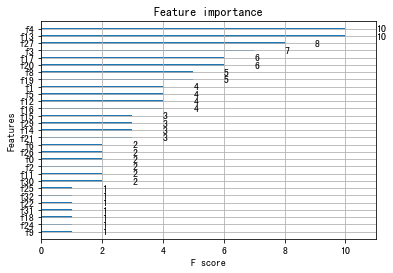

In [44]:
from xgboost import plot_importance
plot_importance(xgb_clf)
plt.show()

### 超参数选择


In [60]:
from sklearn.model_selection import GridSearchCV

cv_params={
    'min_child_weight':range(1,10,2),
    'n_estimators':[20,24,50,100]
}

other_params ={
    'booster':'gbtree',
    'objective':  'multi:softmax',
    'subsample':0.75,
    'lambda':1,
    'max_depth':5,
    'colsample_bytree':0.75,
    'min_child_weight':2,
    'eta': 0.025,
    'seed':0,
    'nthread':8,
     'silent':1
}
model = xgb.XGBClassifier(**other_params)    #**不能省略,不定长传参
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


每轮迭代运行结果:{'mean_fit_time': array([0.04636173, 0.0531672 , 0.10606146, 0.18056664, 0.04313364,
       0.05036278, 0.09079356, 0.15830216, 0.03845649, 0.04382582,
       0.08738599, 0.15426655, 0.03726912, 0.04514499, 0.08397479,
       0.14000902, 0.03595953, 0.04099169, 0.07460542, 0.13341222]), 'std_fit_time': array([0.00381329, 0.00048972, 0.00757019, 0.00492985, 0.00321817,
       0.00438367, 0.00143043, 0.00392274, 0.0011889 , 0.00066499,
       0.00243783, 0.00276891, 0.0019268 , 0.00120236, 0.00225429,
       0.0029114 , 0.00024657, 0.00141545, 0.00085037, 0.00173123]), 'mean_score_time': array([0.00086184, 0.00078878, 0.0009542 , 0.00134544, 0.00079494,
       0.00078387, 0.00093169, 0.00123506, 0.00076842, 0.00086317,
       0.00100088, 0.00132203, 0.00080614, 0.00081758, 0.00085464,
       0.00102162, 0.00081525, 0.0007771 , 0.00083947, 0.00099411]), 'std_score_time': array([1.06042988e-04, 2.66357839e-05, 2.44564010e-05, 2.39631306e-04,
       9.62890439e-05, 7.72384061e-05, 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.4s finished
/Users/jacquelin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
